 Question 01



In [1]:
# a) Read the CSV file into a Pandas DataFrame
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Housing.csv")
print(df.head())

Saving Housing.csv to Housing.csv
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [2]:
# b) Store price as dependent variable (Y) and area, bedrooms, bathrooms, stories, furnishingstatus as independent variables (X)
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'furnishingstatus']]
Y = df['price']

# Convert categorical variable (furnishingstatus) to dummy variables
X = pd.get_dummies(X, columns=['furnishingstatus'], drop_first=True)

print(X.head())

   area  bedrooms  bathrooms  stories  furnishingstatus_semi-furnished  \
0  7420         4          2        3                            False   
1  8960         4          4        4                            False   
2  9960         3          2        2                             True   
3  7500         4          2        2                            False   
4  7420         4          1        2                            False   

   furnishingstatus_unfurnished  
0                         False  
1                         False  
2                         False  
3                         False  
4                         False  


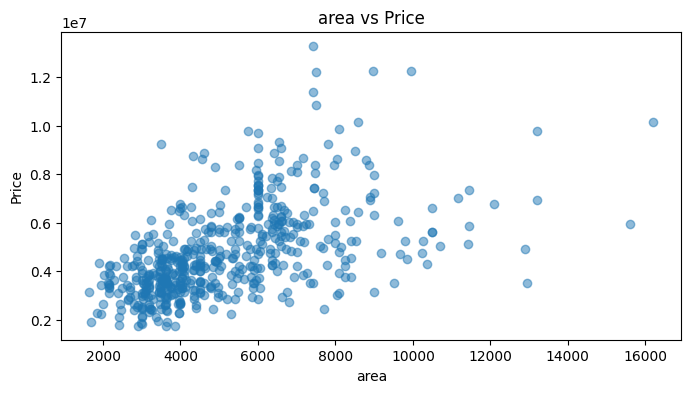

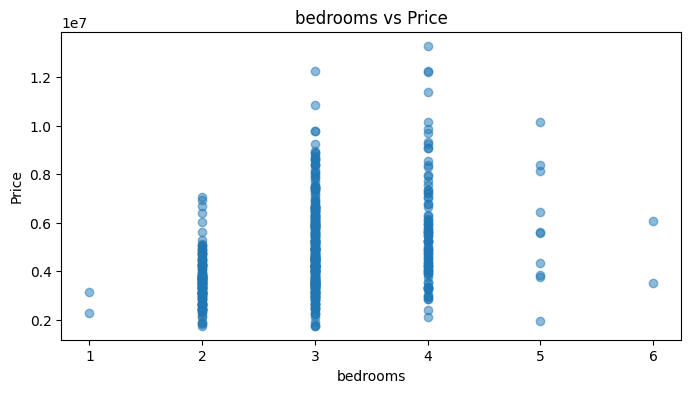

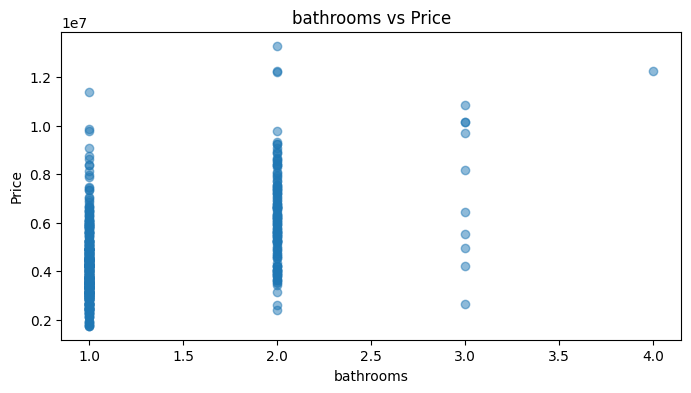

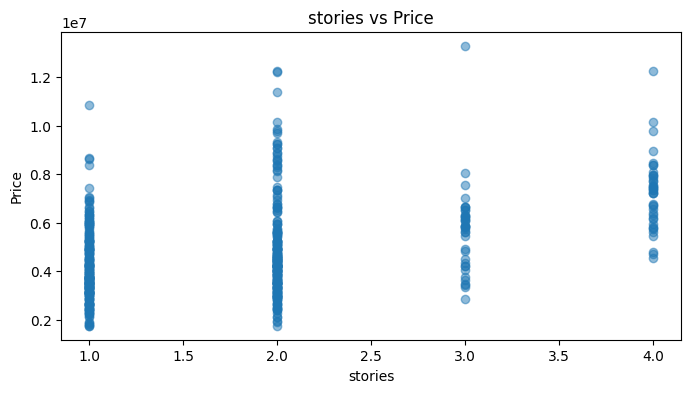

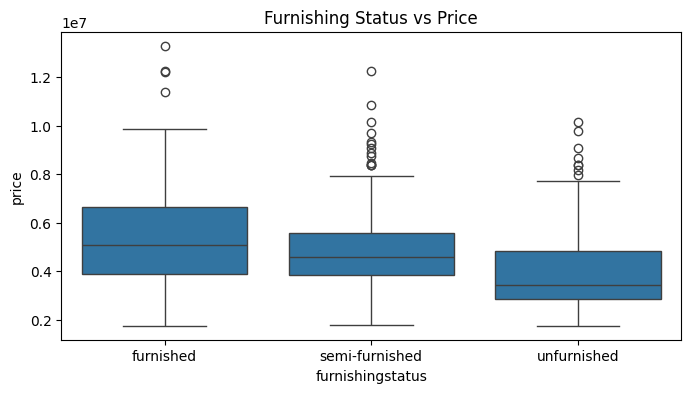

In [3]:
# c) Show (plot) relationships between different independent variables and price
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical variables vs Price
numerical_vars = ['area', 'bedrooms', 'bathrooms', 'stories']
for var in numerical_vars:
    plt.figure(figsize=(8, 4))
    plt.scatter(df[var], df['price'], alpha=0.5)
    plt.title(f'{var} vs Price')
    plt.xlabel(var)
    plt.ylabel('Price')
    plt.show()

# Categorical variable (furnishingstatus) vs Price
plt.figure(figsize=(8, 4))
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.title('Furnishing Status vs Price')
plt.show()

In [4]:
# d) Create training (80%) and test (20%) sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (436, 6) (436,)
Test set shape: (109, 6) (109,)


In [5]:
# e) Use sklearn to perform Linear Regression on the training dataset
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 3.34220860e+02  1.63862309e+05  1.21324897e+06  4.50549179e+05
 -3.18084765e+05 -7.71034686e+05]
Intercept: 539545.0628662547


In [7]:
# f) Predict the price of a house with given features
new_house = pd.DataFrame({
    'area': [4850],
    'bedrooms': [3],
    'bathrooms': [3],
    'stories': [2],
    'furnishingstatus_semi-furnished': [1],
    'furnishingstatus_unfurnished': [0]
})

new_house = new_house[X_train.columns]
predicted_price = model.predict(new_house)
print("Predicted Price:", predicted_price[0])

Predicted Price: 6874863.675099001


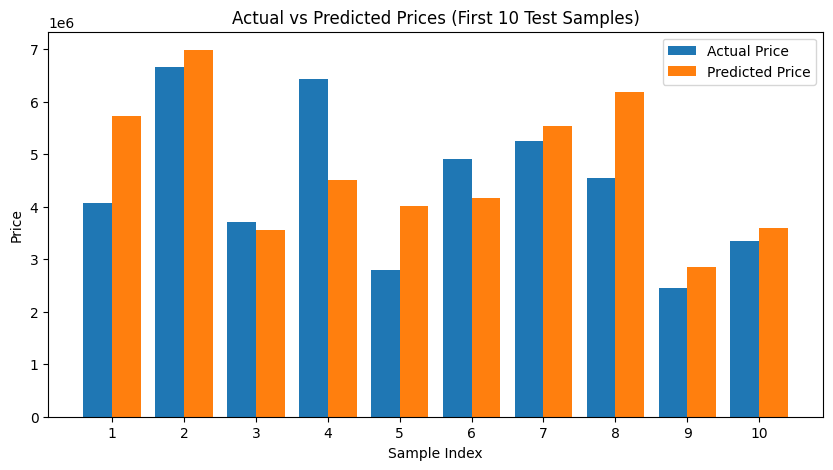

In [10]:
# g) Predict prices for the test set and compare actual vs predicted (first 10 samples)
import numpy as np

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 5))
x_positions = np.arange(10)  # Create an array of positions [0, 1... 9]
plt.bar(x_positions - 0.2, y_test.head(10), width=0.4, label='Actual Price')
plt.bar(x_positions + 0.2, y_pred[:10], width=0.4, label='Predicted Price')
plt.xticks(x_positions, labels=range(1, 11))  # Label x-axis from 1 to 10
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices (First 10 Test Samples)')
plt.legend()
plt.show()

In [9]:
# h) Calculate R², MSE, and RMSE on the test set
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R² Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

R² Score: 0.5302151041622871
Mean Squared Error (MSE): 2374560756690.5103
Root Mean Squared Error (RMSE): 1540960.9848047777


Question 02

In [11]:
# a) Read the CSV and Summarize DataFrame
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.pipeline import make_pipeline
import pandas as pd
import pandas as pd
from google.colab import files

uploaded = files.upload()

df = pd.read_csv('Bank.csv')

print("DataFrame Summary")
print(df.head())
df.info()
print(df.describe())

Saving Bank.csv to Bank.csv
DataFrame Summary
   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
<class 'pandas.core.frame.DataFrame'>
RangeInde

In [12]:
# b) Define Class (Y) and Independent Variables (X)
X = df[['Age', 'Experience', 'Income', 'Education']]
y = df['Personal Loan']
print("X and y")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Class distribution (Personal Loan):")
print(y.value_counts())

X and y
X shape: (5000, 4)
y shape: (5000,)
Class distribution (Personal Loan):
Personal Loan
0    4520
1     480
Name: count, dtype: int64


In [13]:
# c) Standard Scaling of Numeric Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print("Scaled Features")
print("First 5 rows after scaling:")
print(X_scaled.head())
print("Mean and Std after scaling:")
print("Mean:", X_scaled.mean().values)
print("Std:", X_scaled.std().values)

Scaled Features
First 5 rows after scaling:
        Age  Experience    Income  Education
0 -1.774417   -1.666078 -0.538229  -1.049078
1 -0.029524   -0.096330 -0.864109  -1.049078
2 -0.552992   -0.445163 -1.363793  -1.049078
3 -0.901970   -0.968413  0.569765   0.141703
4 -0.901970   -1.055621 -0.625130   0.141703
Mean and Std after scaling:
Mean: [-2.13162821e-18 -1.17950094e-16  1.44950718e-16  2.55795385e-17]
Std: [1.00010002 1.00010002 1.00010002 1.00010002]


In [14]:
# d) Split into training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print("Train-Test Split")
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train-Test Split
Training set size: (4000, 4)
Test set size: (1000, 4)


In [15]:
# e) Train Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
print("Model Training")
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Model Training
Model coefficients: [[-0.43469188  0.4997363   2.28685723  1.3768392 ]]
Model intercept: [-4.0617452]


In [16]:
# f) Evaluate on test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Test Evaluation")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Test Evaluation
Accuracy: 0.9500
F1 Score: 0.7126
Confusion Matrix:
[[888   7]
 [ 43  62]]


In [17]:
# g) 5-fold cross-validation
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print("5-Fold CV")
print("CV Scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

5-Fold CV
CV Scores: [0.949 0.931 0.948 0.94  0.94 ]
Mean CV Accuracy: 0.9416


In [18]:
# h) Predict for new data points
new_data = pd.DataFrame({
    'Age': [30, 45, 35, 50, 40],
    'Experience': [5, 20, 10, 25, 15],
    'Income': [60, 120, 90, 150, 80],
    'Education': [1, 3, 2, 3, 2]
})
new_data_scaled = scaler.transform(new_data)
predictions = model.predict(new_data_scaled)
print("New Data Predictions")
print("Predictions (0=Reject, 1=Accept):", predictions)

New Data Predictions
Predictions (0=Reject, 1=Accept): [0 1 0 1 0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
